# Performing Probabilistic Forecasting with a Deployed DeepAR Model

<img align="left" width="130" src="https://raw.githubusercontent.com/PacktPublishing/Amazon-SageMaker-Cookbook/master/Extra/cover-small-padded.png"/>

This notebook contains the code to help readers work through one of the recipes of the book [Machine Learning with Amazon SageMaker Cookbook: 80 proven recipes for data scientists and developers to perform ML experiments and deployments](https://www.amazon.com/Machine-Learning-Amazon-SageMaker-Cookbook/dp/1800567030)

### How to do it...

In [39]:
%store -r endpoint_name
%store -r training_dataset
%store -r target_dataset
%store -r freq
%store -r prediction_length

In [40]:
import sagemaker 
import boto3
from sagemaker import get_execution_role 

role = get_execution_role()
session = sagemaker.Session()

In [41]:
Predictor = sagemaker.predictor.Predictor
predictor = Predictor(
    endpoint_name=endpoint_name, 
    sagemaker_session=session
)

In [42]:
predictor.serializer = sagemaker.serializers.JSONSerializer()

In [43]:
quantiles=["0.1", "0.5", "0.9"]

configuration = {
    "num_samples": 100,
    "output_types": ["quantiles"],
    "quantiles": quantiles,
}

In [44]:
def series_to_object(data):
    return {
        "start": str(data.index[0]), 
        "target": list(data)
    }

In [45]:
instances = [series_to_object(training_dataset)]

http_request_data = {
    "instances": instances, 
    "configuration": configuration
}
http_request_data

{'instances': [{'start': '2020-01-01 00:00:00',
   'target': [-118.52082060067684,
    -121.4175575551188,
    -113.62459432605203,
    -197.07422525358263,
    11.191462904161721,
    29.736005749623345,
    76.24486604755742,
    27.736000398893164,
    18.848302861216744,
    74.35698555341803,
    129.43327295181004,
    94.57009100792779,
    72.3348002974416,
    191.49188900648832,
    241.77476622998327,
    151.61038580421513,
    368.57323644034955,
    463.07220330967186,
    452.76943649864734,
    496.8596754707588,
    137.119659729258,
    235.45660289058011,
    347.32993934978765,
    230.94355499633014,
    400.39680887729725,
    362.6708489975951,
    279.8031994561626,
    569.1736855202247,
    597.2351937381563,
    776.9566278787247,
    633.3240728695606,
    724.8999069748967,
    695.1055239344122,
    832.3916629027741,
    836.5742125904031,
    918.0182569741863,
    966.5558358899701,
    890.7053052359212,
    988.1336175250193,
    1368.507116793928,
  

In [46]:
response = predictor.predict(http_request_data)
response

b'{"predictions":[{"quantiles":{"0.1":[232.6628417969,-92.3196258545,-201.5193023682,-152.3560180664,-72.4030151367,-39.9406814575,0.882938385,-24.5854415894,-35.208316803,-26.7250709534,-7.3603286743,13.614944458,14.7693786621,107.9454421997,68.7142333984,132.1875610352,164.6631317139,194.9070129395,260.2215270996,340.0536193848,179.3213806152,120.1090164185,127.9379501343,203.2137756348,315.7844848633,356.9918212891,381.6810302734,405.832611084,435.7929992676,459.6116943359,477.0500488281,512.4328613281,591.6383666992,609.7576904297,668.903137207,766.6267700195,774.6834716797,800.0463867188,860.891784668,971.8174438477,1033.1353759766,1177.3732910156,1255.0725097656,1313.5385742188,1313.0238037109,1445.6782226562,1597.4324951172,1732.7114257812,1729.9774169922,1225.181640625],"0.5":[682.0487060547,156.4238433838,-28.1074924469,-29.3493881226,9.8422651291,28.4847545624,80.2063598633,55.2422523499,52.2062530518,58.6093215942,76.8196640015,98.9646224976,107.7777328491,191.9140167236,173

In [47]:
import json

response_data = json.loads(response)
response_data

{'predictions': [{'quantiles': {'0.1': [232.6628417969,
     -92.3196258545,
     -201.5193023682,
     -152.3560180664,
     -72.4030151367,
     -39.9406814575,
     0.882938385,
     -24.5854415894,
     -35.208316803,
     -26.7250709534,
     -7.3603286743,
     13.614944458,
     14.7693786621,
     107.9454421997,
     68.7142333984,
     132.1875610352,
     164.6631317139,
     194.9070129395,
     260.2215270996,
     340.0536193848,
     179.3213806152,
     120.1090164185,
     127.9379501343,
     203.2137756348,
     315.7844848633,
     356.9918212891,
     381.6810302734,
     405.832611084,
     435.7929992676,
     459.6116943359,
     477.0500488281,
     512.4328613281,
     591.6383666992,
     609.7576904297,
     668.903137207,
     766.6267700195,
     774.6834716797,
     800.0463867188,
     860.891784668,
     971.8174438477,
     1033.1353759766,
     1177.3732910156,
     1255.0725097656,
     1313.5385742188,
     1313.0238037109,
     1445.6782226562,
   

In [48]:
single_result = response_data['predictions'][0]
single_result

{'quantiles': {'0.1': [232.6628417969,
   -92.3196258545,
   -201.5193023682,
   -152.3560180664,
   -72.4030151367,
   -39.9406814575,
   0.882938385,
   -24.5854415894,
   -35.208316803,
   -26.7250709534,
   -7.3603286743,
   13.614944458,
   14.7693786621,
   107.9454421997,
   68.7142333984,
   132.1875610352,
   164.6631317139,
   194.9070129395,
   260.2215270996,
   340.0536193848,
   179.3213806152,
   120.1090164185,
   127.9379501343,
   203.2137756348,
   315.7844848633,
   356.9918212891,
   381.6810302734,
   405.832611084,
   435.7929992676,
   459.6116943359,
   477.0500488281,
   512.4328613281,
   591.6383666992,
   609.7576904297,
   668.903137207,
   766.6267700195,
   774.6834716797,
   800.0463867188,
   860.891784668,
   971.8174438477,
   1033.1353759766,
   1177.3732910156,
   1255.0725097656,
   1313.5385742188,
   1313.0238037109,
   1445.6782226562,
   1597.4324951172,
   1732.7114257812,
   1729.9774169922,
   1225.181640625],
  '0.5': [682.0487060547,
   1

In [49]:
import pandas as pd

prediction_time = training_dataset.index[-1] + pd.Timedelta(1, unit=freq)
prediction_time

Timestamp('2020-01-19 18:00:00', freq='H')

In [50]:
prediction_index = pd.date_range(
    start=prediction_time, 
    freq=freq, 
    periods=prediction_length
)

prediction_index

DatetimeIndex(['2020-01-19 18:00:00', '2020-01-19 19:00:00',
               '2020-01-19 20:00:00', '2020-01-19 21:00:00',
               '2020-01-19 22:00:00', '2020-01-19 23:00:00',
               '2020-01-20 00:00:00', '2020-01-20 01:00:00',
               '2020-01-20 02:00:00', '2020-01-20 03:00:00',
               '2020-01-20 04:00:00', '2020-01-20 05:00:00',
               '2020-01-20 06:00:00', '2020-01-20 07:00:00',
               '2020-01-20 08:00:00', '2020-01-20 09:00:00',
               '2020-01-20 10:00:00', '2020-01-20 11:00:00',
               '2020-01-20 12:00:00', '2020-01-20 13:00:00',
               '2020-01-20 14:00:00', '2020-01-20 15:00:00',
               '2020-01-20 16:00:00', '2020-01-20 17:00:00',
               '2020-01-20 18:00:00', '2020-01-20 19:00:00',
               '2020-01-20 20:00:00', '2020-01-20 21:00:00',
               '2020-01-20 22:00:00', '2020-01-20 23:00:00',
               '2020-01-21 00:00:00', '2020-01-21 01:00:00',
               '2020-01-

In [51]:
output = pd.DataFrame(
    data=single_result['quantiles'], 
    index=prediction_index
)
output

,0.1,0.5,0.9
2020-01-19 18:00:00,232.662842,682.048706,1095.776245
2020-01-19 19:00:00,-92.319626,156.423843,375.291443
2020-01-19 20:00:00,-201.519302,-28.107492,165.889114
2020-01-19 21:00:00,-152.356018,-29.349388,94.649643
2020-01-19 22:00:00,-72.403015,9.842265,109.686554
2020-01-19 23:00:00,-39.940681,28.484755,110.671051
2020-01-20 00:00:00,0.882938,80.206360,159.140900
2020-01-20 01:00:00,-24.585442,55.242252,127.168518
2020-01-20 02:00:00,-35.208317,52.206253,128.978928
2020-01-20 03:00:00,-26.725071,58.609322,139.663788


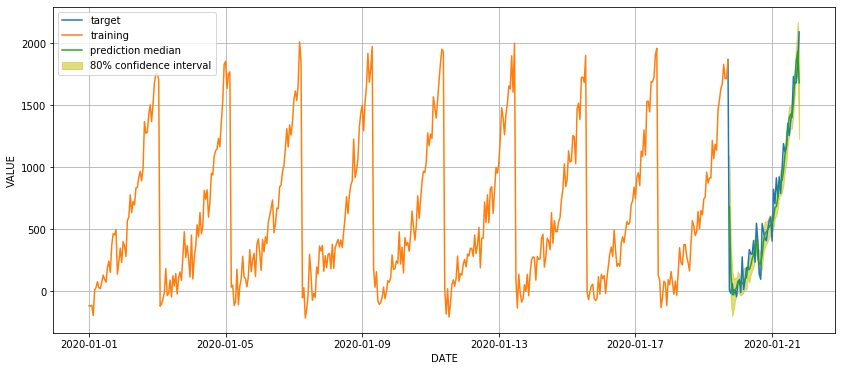

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,6))
plt.plot(target_dataset.index, 
         target_dataset, 
         label="target")
plt.plot(training_dataset.index, 
         training_dataset, 
         label="training")
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("VALUE")    

p10 = output["0.1"]
p90 = output["0.9"]
plt.fill_between(
    p10.index, 
    p10, 
    p90, 
    color="y", 
    alpha=0.5, 
    label="80% confidence interval"
)

plt.plot(output["0.5"].index, 
         output["0.5"], 
         label="prediction median")

plt.legend()
plt.show()

In [53]:
# predictor.delete_endpoint()